In [ ]:
#Refernce to these code is: https://github.com/deep-learning-with-pytorch/dlwpt-code

In [17]:
import torch.nn as nn
import torch
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim
from collections import OrderedDict

# Chapter 6: Using a neural network to fit the data # 

- Nonlinear activation functions as the key difference compared with linear models
- Working with PyTorch’s nn module
- Solving a linear-fit problem with a neural network

###  Artificial Neuron Network ###

An important difference between linear model and deep learning model is the shape of the error function. 
linear model has a convex error curve with a singular, clearly defined minimum. 
Neural networks do not have the same property of a convex error surface, even when using the same error-squared 
loss function! There’s no single right answer for each parameter we are attempting to approximate.

###  Activation Function ### 

We need activation function for two reasons:
- In the inner parts of the model, it allows the output function to have different
    slopes at different values. something a linear function by definition cannot do.
- At the last layer of the network, it has the role of concentrating the outputs of
    the preceding linear operation into a given range.
    
Common activation functions are (Tanh,Softplus,Hardtanh, Sigmoid, ReLU,LeakyReLU)

### What learning means for a neural network ###

A successfully trained network, through the values of its weights and biases, will capture the inherent structure of the
data in the form of meaningful numerical representations that work correctly for previously unseen data. 
Specializing a generic model to a task using examples is what we refer to as learning, because the model 
wasn’t built with that specific task in mind—no rules describing how that task worked were encoded in the model.

## The PyTorch nn module ## 

### NN linear model ###

In images, our input is B × C × H × W with a batch size of 3 (say, images of a dog, a bird, and then a car), 
three channel dimensions (red, green, and blue),
and an unspecified number of pixels for height and width

# Lets get data from previous chapter

We get temperature data in good old Celsius and measurements from our new thermometer, and create models.

In [32]:
# t_c are values in celsius
# t_u are values in unknown unit

t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]


# We reshape our B inputs to B × Nin, where Nin is 1. That is easily done with unsqueeze:
t_c = torch.tensor(t_c).unsqueeze(1) 
t_u = torch.tensor(t_u).unsqueeze(1)

n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

# define indices to divide train and val set
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

#normalized unknown values of train and validation
t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val


A PyTorch has a module dedicated for NN called torch.nn. 
It is a Python class deriving from the nn.Module base class. 

In [38]:
linear_model = nn.Linear(1, 1)

print(linear_model(t_un_val))

print("linear model weight are\n", linear_model.weight)
print("----------")
print("linear model bias are\n ", linear_model.bias)

tensor([[-3.6958],
        [-4.9785]], grad_fn=<AddmmBackward0>)
linear model weight are
 Parameter containing:
tensor([[-0.5966]], requires_grad=True)
----------
linear model bias are
  Parameter containing:
tensor([-0.0922], requires_grad=True)


In [34]:
#model on batch of input
x = torch.ones(10, 1)
linear_model (x)


tensor([[-1.5701],
        [-1.5701],
        [-1.5701],
        [-1.5701],
        [-1.5701],
        [-1.5701],
        [-1.5701],
        [-1.5701],
        [-1.5701],
        [-1.5701]], grad_fn=<AddmmBackward0>)

In [36]:
optimizer = optim.SGD(linear_model.parameters(),lr=1e-2)
print("list of parameters: \n", list(linear_model.parameters()))

list of parameters: 
 [Parameter containing:
tensor([[-0.7817]], requires_grad=True), Parameter containing:
tensor([-0.7883], requires_grad=True)]


In [39]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train)
        loss_train = loss_fn(t_p_train, t_c_train)
        t_p_val = model(t_u_val)
        loss_val = loss_fn(t_p_val, t_c_val)
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"f" Validation loss {loss_val.item():.4f}")

In [40]:
training_loop( 
    n_epochs = 3000,
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val )

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 192.5650, Validation loss 683.1639
Epoch 1000, Training loss 192.5650, Validation loss 683.1639
Epoch 2000, Training loss 192.5650, Validation loss 683.1639
Epoch 3000, Training loss 192.5650, Validation loss 683.1639

Parameter containing:
tensor([[-0.5966]], requires_grad=True)
Parameter containing:
tensor([-0.0922], requires_grad=True)


### NN sequential model ###

In [42]:
seq_model = nn.Sequential( 
    nn.Linear(1, 13),
    nn.Tanh(),
    nn.Linear(13, 1))

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
    ]))

for name, param in seq_model.named_parameters():
    print(name, param.shape)

print()
print("bias of seq model", seq_model.output_linear.bias)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])

bias of seq model Parameter containing:
tensor([0.0810], requires_grad=True)


In [44]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val,
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print('output: ', seq_model(t_un_val))
print('answer: ', t_c_val)
print('hidden: ', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 1.8181, Validation loss 8.8468
Epoch 1000, Training loss 1.6397, Validation loss 7.1826
Epoch 2000, Training loss 1.5617, Validation loss 6.3624
Epoch 3000, Training loss 1.5310, Validation loss 5.9330
Epoch 4000, Training loss 1.5097, Validation loss 5.6701
Epoch 5000, Training loss 1.4931, Validation loss 5.5107
output:  tensor([[15.7982],
        [26.2136]], grad_fn=<AddmmBackward0>)
answer:  tensor([[13.],
        [28.]])
hidden:  tensor([[ 0.0082],
        [ 0.0032],
        [ 0.0086],
        [-0.0073],
        [-0.0200],
        [-0.0147],
        [ 0.0097],
        [-0.0025]])


## Comparing sequential NN model to Linear NN model ## 

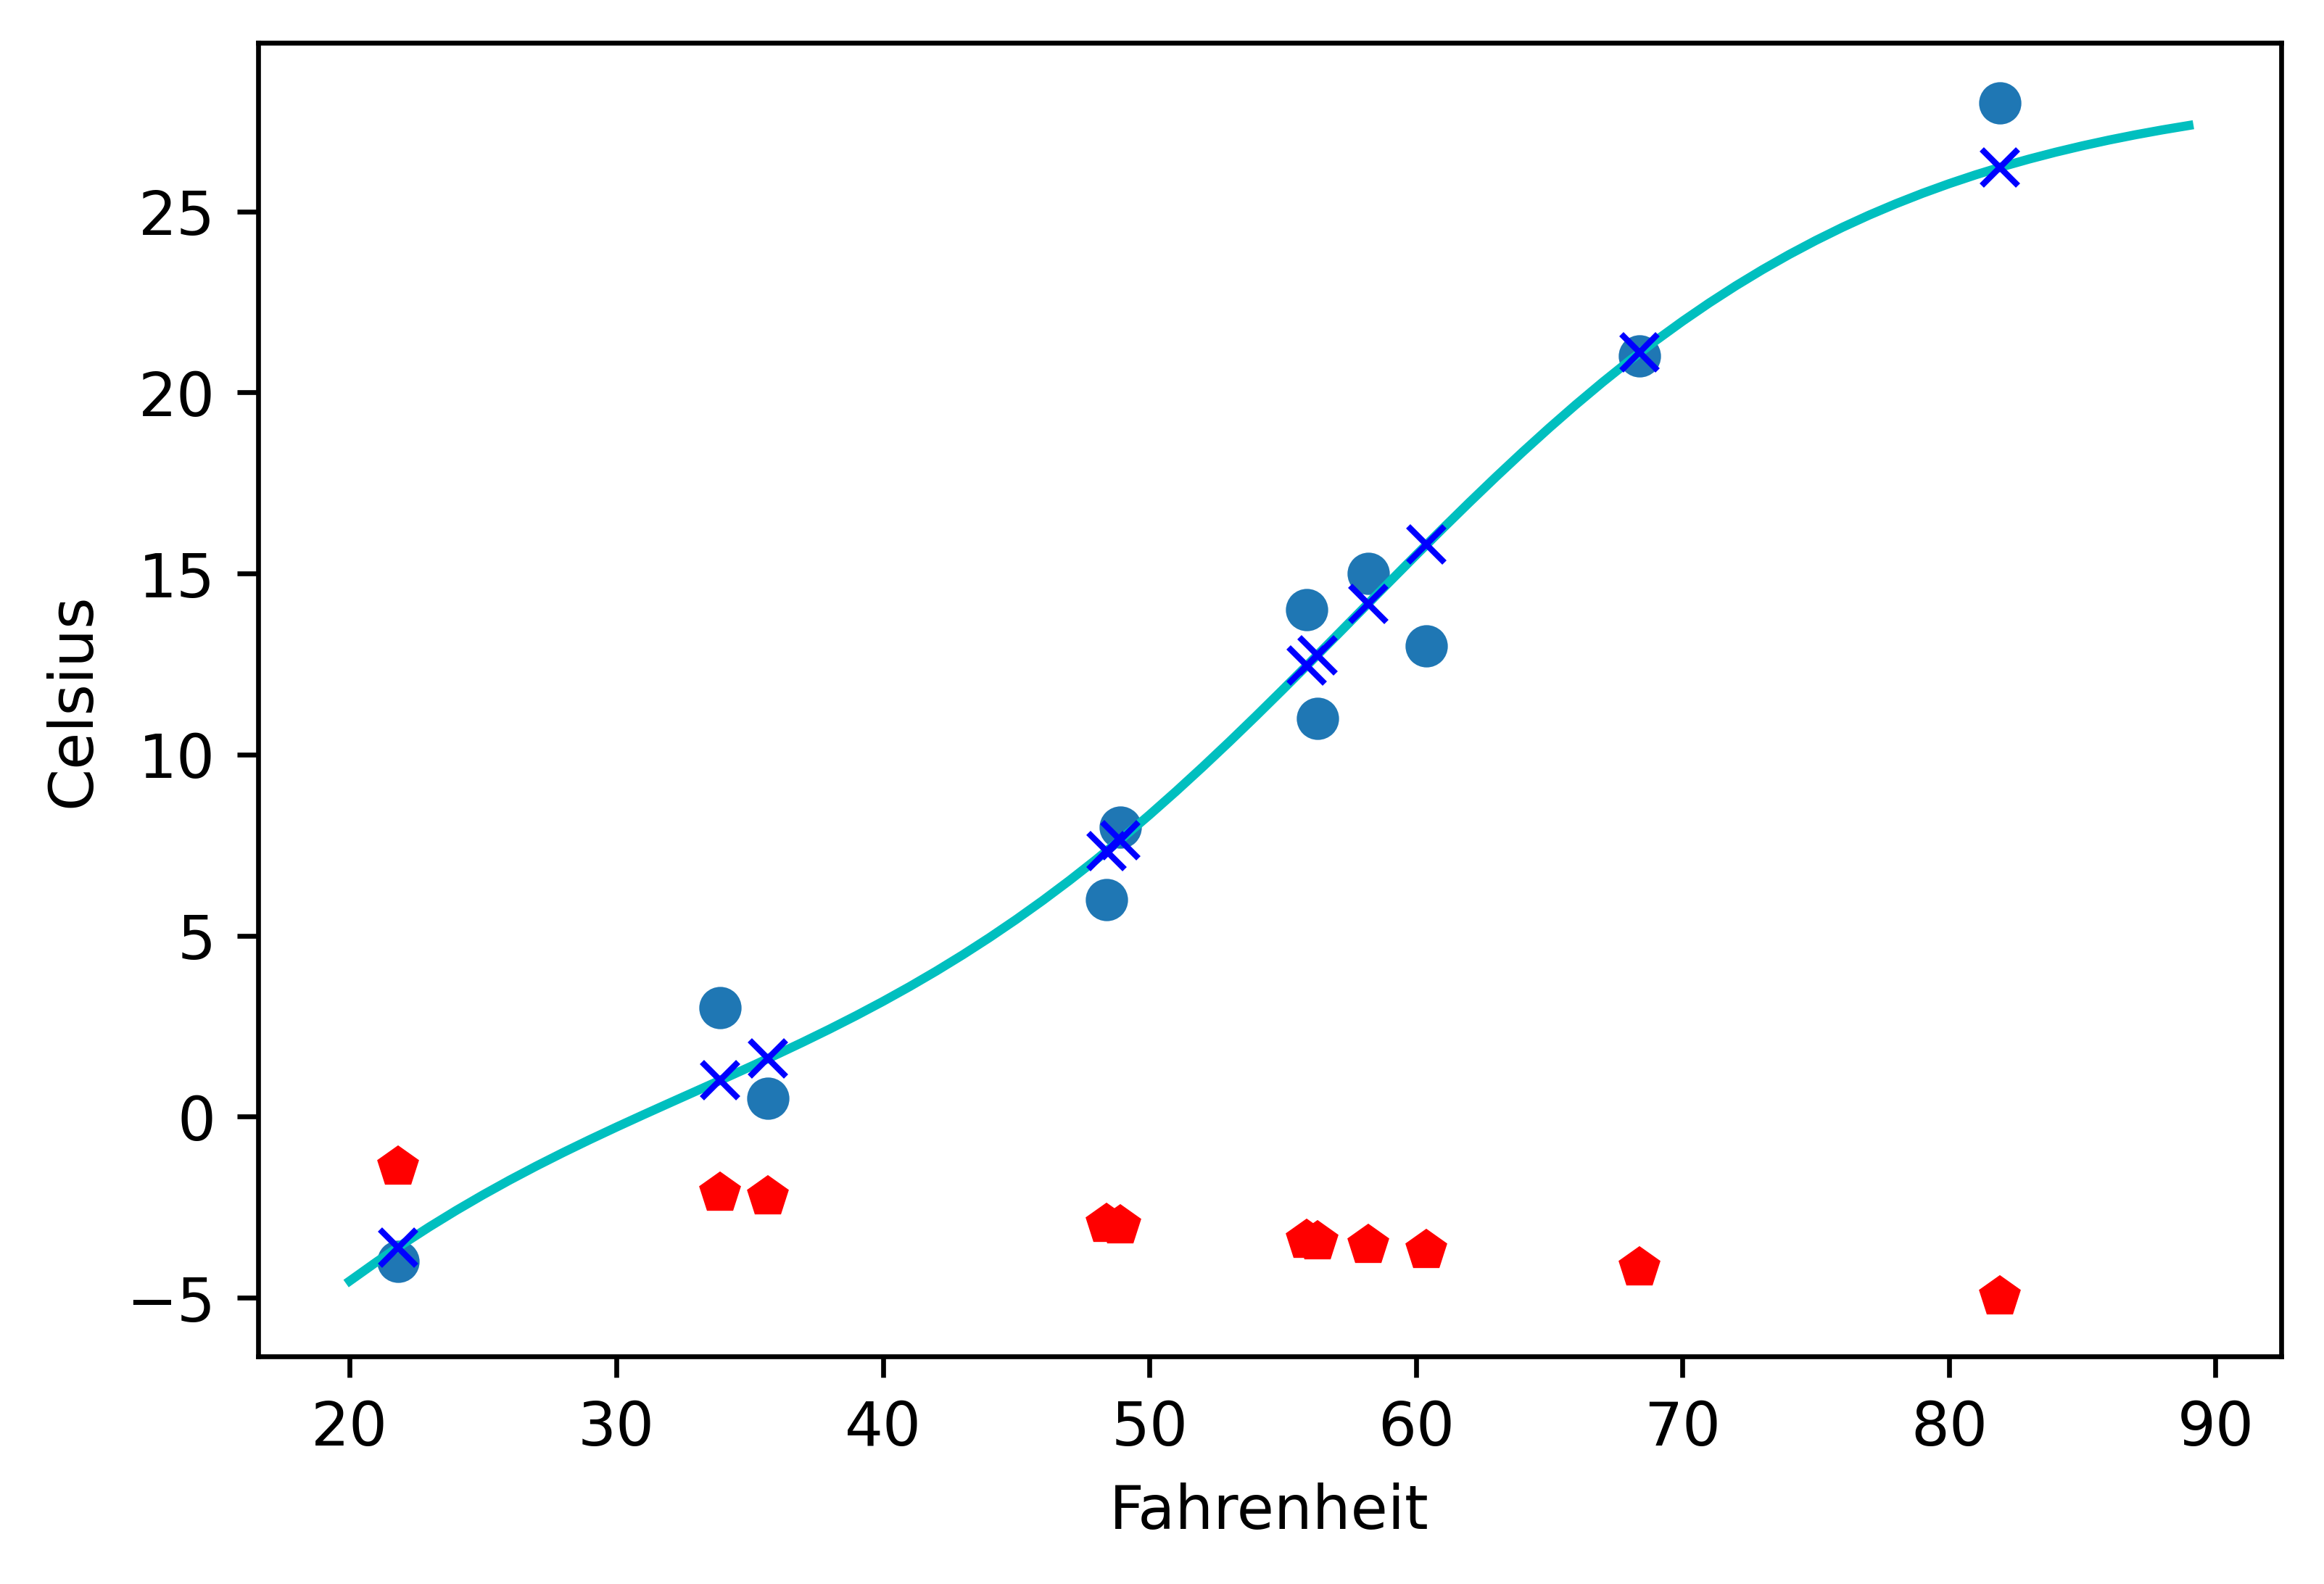

In [67]:

#detach and numpy are needed to extract output in list of float format 

t_range=torch.arange(20.,90.).unsqueeze(1)
fig=plt.figure(dpi=600)

plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(),t_c.numpy(),'o')
plt.plot(t_range.numpy(),seq_model(0.1*t_range).detach().numpy(),'c-')
plt.plot(t_u.numpy(),linear_model(0.1*t_u).detach().numpy(),'rp')
plt.plot(t_u.numpy(),seq_model(0.1*t_u).detach().numpy(),'bx')

## More to read about: ##

- #### Activation functions as a key:  ####

[https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning](https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning) 